<a href="https://colab.research.google.com/github/Abdalmughith/ML_Project_test_best_model_for_currency_recognition/blob/master/ML_Project_test_best_model_for_currency_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
from keras.applications.mobilenet import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.models import Model
from keras.utils import np_utils
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier,LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import  accuracy_score
from sklearn import neighbors
# from sklearn.preprocessing import OneHotEncoder
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dropout, Dense, Activation, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import cv2
from PIL import Image
from keras import applications
import itertools

Using TensorFlow backend.


# Functions

In [0]:
def get_label(p_y):
    idx = p_y.argmax(axis = 1)
    pred_y = 0
    for i in idx:
        if i == 0:
            pred_y = 500
        elif i == 1:
            pred_y = 1000
        elif i == 2:
            pred_y = 2000
        else:
            pred_y = -10
    return pred_y

In [0]:
def normalize(X):
    X = X.astype(np.float32) / 127.5
    X -= 1
    return X

In [0]:
def normalize2(X):
    X = X.astype(np.float32) / 255
    return X

In [0]:
def report(y_test, pred_y, normalize = True):
    print('Accuuracy =' , accuracy_score(y_test, pred_y))
    print(classification_report(y_test, pred_y))
    print('---------------------------------------------')
    conf_mat = confusion_matrix(y_test, pred_y)
    plot_confusion_matrix(conf_mat, normalize = normalize, classes = ['100', '200', '500', '1000', '2000'])

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix:")
#     else:
#         print('Confusion matrix, without normalization:')

#     print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Read Orginal Data

In [0]:
org_X = []
org_Y = []
imagePath = "C:\\Users\\Baraa\\Desktop\\desktop\\final\\100\\" 
allImageInDir = os.listdir(imagePath)
for i in allImageInDir:
    img = Image.open(imagePath + i)
    scaled_img = img.resize(size=(224, 224))
    org_X.append(np.asarray(scaled_img))    
y = np.zeros([5])
y[0] = 1
org_Y = org_Y + [y] * len(allImageInDir)
imagePath = "C:\\Users\\Baraa\\Desktop\\desktop\\final\\200\\" 
allImageInDir = os.listdir(imagePath)
for i in allImageInDir:
    img = Image.open(imagePath + i)
    scaled_img = img.resize(size=(224, 224))
    org_X.append(np.asarray(scaled_img))    
y = np.zeros([5])
y[1] = 1
org_Y = org_Y + [y] * len(allImageInDir)
imagePath = "C:\\Users\\Baraa\\Desktop\\desktop\\final\\500\\" 
allImageInDir = os.listdir(imagePath)
for i in allImageInDir:
    img = Image.open(imagePath + i)
    scaled_img = img.resize(size=(224, 224))
    org_X.append(np.asarray(scaled_img))    
y = np.zeros([5])
y[2] = 1
org_Y = [y] * len(allImageInDir)
imagePath = "C:\\Users\\Baraa\\Desktop\\desktop\\final\\1000\\" 
allImageInDir = os.listdir(imagePath)
for i in allImageInDir:
    img = Image.open(imagePath + i)
    scaled_img = img.resize(size=(224, 224))
    org_X.append(np.asarray(scaled_img))    
y = np.zeros([5])
y[3] = 1
org_Y = org_Y + [y] * len(allImageInDir)
imagePath = "C:\\Users\\Baraa\\Desktop\\desktop\\final\\2000\\" 
allImageInDir = os.listdir(imagePath)
for i in allImageInDir:
    img = Image.open(imagePath + i)
    scaled_img = img.resize(size=(224, 224))
    org_X.append(np.asarray(scaled_img))    
y = np.zeros([5])
y[4] = 1
org_Y = org_Y + [y] * len(allImageInDir)
org_X = np.asarray(org_X)
# org_X = np.array(org_X)
org_Y = np.asarray(org_Y)

In [0]:
np.save(open('npy\\org_X.npy', 'wb'), org_X)
np.save(open('npy\\org_Y.npy', 'wb'), org_Y)

# Image Augmentation

In [0]:
org_X = np.load(open('npy\\org_X.npy', 'rb'))
org_Y = np.load(open('npy\\org_Y.npy', 'rb'))

In [0]:
datagen = ImageDataGenerator(rotation_range = 90, width_shift_range = 0.2, height_shift_range = 0.2, 
                             horizontal_flip = True, vertical_flip = True
                            )
# datagen = ImageDataGenerator(rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2,
#                              shear_range = 0.2, # shear intensity (shear angle in degrees)
#                              horizontal_flip = True,
#                             )

In [0]:
datagen.fit(org_X)

In [0]:
gen_X = []
gen_Y = []
for idx in range(len(org_X)):
    i = 0
    for img in datagen.flow(org_X[idx:idx + 1], org_Y[idx:idx + 1], batch_size = 2):
        i = i + 1
        gen_X.append(img[0][0])
        gen_Y.append(img[1][0])
        if i == 10:
            break

In [0]:
gen_X = np.asarray(gen_X)
gen_Y = np.asarray(gen_Y)

In [0]:
np.save(open('npy\\gen_X.npy', 'wb'), gen_X)
np.save(open('npy\\gen_Y.npy', 'wb'), gen_Y)

# Transfer Learning: MobileNet Model as Fixed Feature Extractor

In [0]:
base_model = MobileNet(weights = 'imagenet')
base_model.summary()

In [0]:
tra_model = Model(inputs = base_model.input, outputs = base_model.get_layer('conv_preds').output)
tra_model.summary()

## Extract Features from Orginal Data Using Transfered Model

In [0]:
org_X = np.load(open('npy\\org_X.npy', 'rb'))
org_Y = np.load(open('npy\\org_Y.npy', 'rb'))

In [0]:
# org_X_pred = tra_model.predict(org_X)
# org_X_pred = org_X_pred.reshape(org_X_pred.shape[0], org_X_pred.shape[3])
# np.save(open('npy\\org_X.npy', 'wb'), org_X)
# np.save(open('npy\\org_X_pred.npy', 'wb'), org_X_pred)
# np.save(open('npy\\org_Y.npy', 'wb'), org_Y)

In [0]:
# normalized_org_X = normalize(org_X)
# normalized_org_X_pred = tra_model.predict(normalized_org_X)
# normalized_org_X_pred = normalized_org_X_pred.reshape(normalized_org_X_pred.shape[0], normalized_org_X_pred.shape[3])
# np.save(open('npy\\normalized_org_X.npy', 'wb'), normalized_org_X)
# np.save(open('npy\\normalized_org_X_pred.npy', 'wb'), normalized_org_X_pred)
# np.save(open('npy\\org_Y.npy', 'wb'), org_Y)

In [0]:
# normalized2_org_X = normalize2(org_X)
# normalized2_org_X_pred = tra_model.predict(normalized2_org_X)
# normalized2_org_X_pred = normalized2_org_X_pred.reshape(normalized2_org_X_pred.shape[0], normalized2_org_X_pred.shape[3])
# np.save(open('npy\\normalized2_org_X.npy', 'wb'), normalized2_org_X)
# np.save(open('npy\\normalized2_org_X_pred.npy', 'wb'), normalized2_org_X_pred)
# np.save(open('npy\\org_Y.npy', 'wb'), org_Y)

## Extract Features from Generated Data Using Transfered Model

In [0]:
gen_X = np.load(open('npy\\gen_X.npy', 'rb'))
gen_Y = np.load(open('npy\\gen_Y.npy', 'rb'))

In [0]:
# gen_X_pred = tra_model.predict(gen_X)
# gen_X_pred = gen_X_pred.reshape(gen_X_pred.shape[0], gen_X_pred.shape[3])
# np.save(open('npy\\gen_X_pred.npy', 'wb'), gen_X_pred)

In [0]:
# normalized_gen_X = normalize(gen_X)
# normalized_gen_X_pred = tra_model.predict(normalized_gen_X)
# normalized_gen_X_pred = normalized_gen_X_pred.reshape(normalized_gen_X_pred.shape[0], normalized_gen_X_pred.shape[3])
# np.save(open('npy\\normalized_gen_X.npy', 'wb'), normalized_gen_X)
# np.save(open('npy\\normalized_gen_X_pred.npy', 'wb'), normalized_gen_X_pred)

In [0]:
# normalized2_gen_X = normalize2(gen_X)
# normalized2_gen_X_pred = tra_model.predict(normalized2_gen_X)
# normalized2_gen_X_pred = normalized2_gen_X_pred.reshape(normalized2_gen_X_pred.shape[0], normalized2_gen_X_pred.shape[3])
# np.save(open('npy\\normalized2_gen_X.npy', 'wb'), normalized2_gen_X)
# np.save(open('npy\\normalized2_gen_X_pred.npy', 'wb'), normalized2_gen_X_pred)

## Combine Features of Orginal Data with Features of Generated Data

In [0]:
org_X = np.load(open('npy\\org_X.npy', 'rb'))
gen_X = np.load(open('npy\\gen_X.npy', 'rb'))
X = np.vstack([org_X, gen_X])
np.save(open('npy\\X.npy', 'wb'), X)

In [0]:
org_Y = np.load(open('npy\\org_Y.npy', 'rb'))
gen_Y = np.load(open('npy\\gen_Y.npy', 'rb'))
Y = np.vstack([org_Y, gen_Y])
np.save(open('npy\\Y.npy', 'wb'), Y)

In [0]:
normalized_org_X = np.load(open('npy\\normalized_org_X.npy', 'rb'))
normalized_gen_X = np.load(open('npy\\normalized_gen_X.npy', 'rb'))
normalized_X = np.vstack([normalized_org_X, normalized_gen_X])
np.save(open('npy\\normalized_X.npy', 'wb'), normalized_X)

In [0]:
normalized2_org_X = np.load(open('npy\\normalized2_org_X.npy', 'rb'))
normalized2_gen_X = np.load(open('npy\\normalized2_gen_X.npy', 'rb'))
normalized2_X = np.vstack([normalized2_org_X, normalized2_gen_X])
np.save(open('npy\\normalized2_X.npy', 'wb'), normalized2_X)

In [0]:
org_X_pred = np.load(open('npy\\org_X_pred.npy', 'rb'))
gen_X_pred = np.load(open('npy\\gen_X_pred.npy', 'rb'))
X_pred = np.vstack([org_X_pred, gen_X_pred])
np.save(open('npy\\X_pred.npy', 'wb'), X_pred)

In [0]:
normalized_org_X_pred = np.load(open('npy\\normalized_org_X_pred.npy', 'rb'))
normalized_gen_X_pred = np.load(open('npy\\normalized_gen_X_pred.npy', 'rb'))
normalized_X_pred = np.vstack([normalized_org_X_pred, normalized_gen_X_pred])
np.save(open('npy\\normalized_X_pred.npy', 'wb'), normalized_X_pred)

In [0]:
normalized2_org_X_pred = np.load(open('npy\\normalized2_org_X_pred.npy', 'rb'))
normalized2_gen_X_pred = np.load(open('npy\\normalized2_gen_X_pred.npy', 'rb'))
normalized2_X_pred = np.vstack([normalized2_org_X_pred, normalized2_gen_X_pred])
np.save(open('npy\\normalized2_X_pred.npy', 'wb'), normalized2_X_pred)

# Load Data

## Load Orginal Data

In [0]:
X_pred = np.load(open('npy\\org_X_pred.npy', 'rb'))
X_pred = np.load(open('npy\\normalized_org_X_pred.npy', 'rb'))
X_pred = np.load(open('npy\\normalized2_org_X_pred.npy', 'rb'))
Y = np.load(open('npy\\org_Y.npy', 'rb'))
# X = np.load(open('npy\\org_X.npy', 'rb'))
# X = np.load(open('npy\\normalized_org_X.npy', 'rb'))
# X = np.load(open('npy\\normalized2_org_X.npy', 'rb'))

## Load Generated Data

In [0]:
X_pred = np.load(open('npy\\gen_X_pred.npy', 'rb'))
X_pred = np.load(open('npy\\normalized_gen_X_pred.npy', 'rb'))
X_pred = np.load(open('npy\\normalized2_gen_X_pred.npy', 'rb'))
Y = np.load(open('npy\\gen_Y.npy', 'rb'))
# X = np.load(open('npy\\gen_X.npy', 'rb'))
# X = np.load(open('npy\\normalized_gen_X.npy', 'rb'))
# X = np.load(open('npy\\normalized2_gen_X.npy', 'rb'))

## Load Combined Data

In [0]:
X_pred = np.load(open('npy\\X_pred.npy', 'rb'))
X_pred = np.load(open('npy\\normalized_X_pred.npy', 'rb'))
X_pred = np.load(open('npy\\normalized2_X_pred.npy', 'rb'))
Y = np.load(open('npy\\Y.npy', 'rb'))
# X = np.load(open('npy\\X.npy', 'rb'))
# X = np.load(open('npy\\normalized_X.npy', 'rb'))
# X = np.load(open('npy\\normalized2_X.npy', 'rb'))

## Split Data

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X_pred, Y, random_state = 42)

In [0]:
y_train = Y_train.argmax(axis = 1)
y_test = Y_test.argmax(axis = 1)

In [0]:
# np_utils.to_categorical(y_test, 4)

# Linear Regression

In [0]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [0]:
p_Y = lin_model.predict(X_test)
pred_y = p_Y.argmax(axis = 1)

## Report

Accuuracy = 0.988439306358
             precision    recall  f1-score   support

          0       0.99      0.98      0.98       121
          1       0.98      1.00      0.99        93
          2       0.99      0.99      0.99       132

avg / total       0.99      0.99      0.99       346

---------------------------------------------


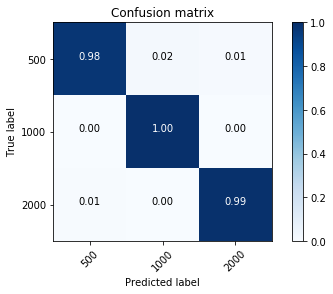

In [0]:
report(y_test, pred_y, True)

# Logistic Regression (One Vs All)

In [0]:
y_500 = y_train.copy()
y_500[y_500 == 0] = 4
y_500[y_500 != 4] = 0
y_500[y_500 == 4] = 1

In [0]:
log_model_500 = LogisticRegression()
log_model_500.fit(X_train, y_500)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [0]:
y_1000 = y_train.copy()
y_1000[y_1000 != 1] = 0

In [0]:
log_model_1000 = LogisticRegression()
log_model_1000.fit(X_train, y_1000)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [0]:
y_2000 = y_train.copy()
y_2000[y_2000 != 2] = 0
y_2000[y_2000 == 2] = 1

In [0]:
log_model_2000 = LogisticRegression()
log_model_2000.fit(X_train, y_2000)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [0]:
p_Y_500 = log_model_500.predict_proba(X_test)
p_Y_1000 = log_model_1000.predict_proba(X_test)
p_Y_2000 = log_model_2000.predict_proba(X_test)
p_Y = np.array([p_Y_500[:,1], p_Y_1000[:,1], p_Y_2000[:,1]])
p_Y = p_Y.T

In [0]:
pred_y = p_Y.argmax(axis = 1)

## Report

Accuuracy = 0.991329479769
             precision    recall  f1-score   support

          0       1.00      0.98      0.99       121
          1       0.99      0.99      0.99        93
          2       0.99      1.00      0.99       132

avg / total       0.99      0.99      0.99       346

---------------------------------------------


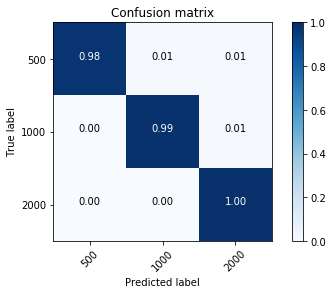

In [0]:
report(y_test, pred_y)

# KNN

In [0]:
knn_model = neighbors.KNeighborsClassifier(3, weights = 'uniform') # 'uniform', 'distance'
knn_model.fit(X_train, y_train)
pred_y = knn_model.predict(X_test)

## Report

Accuuracy = 0.991329479769
             precision    recall  f1-score   support

          0       1.00      0.98      0.99       121
          1       0.99      0.99      0.99        93
          2       0.99      1.00      0.99       132

avg / total       0.99      0.99      0.99       346

---------------------------------------------


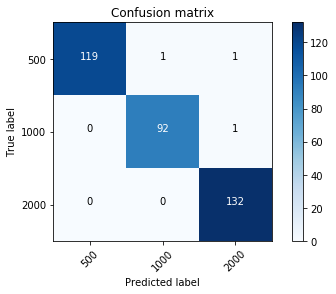

In [0]:
report(y_test, pred_y, False)

In [0]:
cam = cv2.VideoCapture(0)

cv2.namedWindow("test")

img_counter = 0

while True:
    ret, frame = cam.read()
    cv2.imshow("test", frame)

    if not ret:
        break
    k = cv2.waitKey(1)


    if k%256 == 27:
        # ESC pressed
        print("Escape hit, closing...")
        break
    elif k%256 == 32:
        # SPACE pressed
        img_name = "Folder\\opencv_frame_{}.png".format(img_counter)
        cv2.imwrite(img_name, frame)
        print("{} written!".format(img_name))
        img = image.load_img(img_name, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        f = model1.predict(x)
        f = f.reshape(f.shape[3])
        pre= model.predict(np.array([f]))
        print(get_label(pre))
        img_counter += 1

cam.release()

cv2.destroyAllWindows()

In [0]:

for batch in datagen.flow(X[0:3], Y[0:3], batch_size = 3, save_to_dir = 'augmentation3',save_prefix = 'sample_img', save_format='jpeg'):
    i +=1

# datagen.flow(x, batch_size = 1, save_to_dir = 'augmentation',save_prefix = 'sample_img', save_format='jpeg')

In [0]:
# for k in range(len(X)):
#     x = X[k]
#     x = x.reshape((1,) + x.shape) # (1, 224, 224, 3)
#     i = 0 
#     for batch in datagen.flow(x, batch_size = 1, save_to_dir = 'augmentation',save_prefix = 'sample_img', save_format='jpeg'):
#         i +=1
#         if i > 9:
#             break

In [0]:
n_out = 3

model = Sequential()
model.add(Conv2D(16, (3,3), input_shape=(224, 224, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# output is a 3D feature map (height, width, features)

# add two fully connected output layers

model.add(Flatten()) # 1D feature vector
model.add(Dense(units=32, kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=n_out, kernel_initializer='uniform', activation='sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='adam')

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),padding='same',input_shape=(224, 224,3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('sigmoid'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [0]:
model.summary()

In [0]:
model1.fit(X_train, Y_train, epochs = 5)

In [0]:
Y_pred = model1.predict(X_test)

In [0]:
acc = accuracy_score(Y_test, Y_pred)
print(acc)

In [0]:
Y_pred[2]

In [0]:
base_model.summary()

In [0]:
f = model1.predict(x)
f = f.reshape(f.shape[3])
t = np.zeros([4])

In [0]:
# X = [f]
# y = [t]
data = [[f,t]]
imagePath = "E:\\notebooks\\final\\500\\"
allImageInDir=os.listdir(imagePath)
t = np.zeros([4])
t[0] = 1
for i in allImageInDir:
    img = image.load_img(imagePath + i, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    f = model1.predict(x)
    f = f.reshape(f.shape[3])
#     X = np.vstack([X,f])
#     y = np.vstack([y,t])
    data = np.vstack([data,[f,t]])
imagePath = "E:\\notebooks\\final\\1000\\"
allImageInDir=os.listdir(imagePath)
t = np.zeros([4])
t[1] = 1
for i in allImageInDir:
    img = image.load_img(imagePath + i, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    f = model1.predict(x)
    f = f.reshape(f.shape[3])
#     X = np.vstack([X,f])
#     y = np.vstack([y,t])
    data = np.vstack([data,[f,t]])
imagePath = "E:\\notebooks\\final\\2000\\"
allImageInDir=os.listdir(imagePath)
t = np.zeros([4])
t[2] = 1
for i in allImageInDir:
    img = image.load_img(imagePath + i, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    f = model1.predict(x)
    f = f.reshape(f.shape[3])
#     X = np.vstack([X,f])
#     y = np.vstack([y,t])
    data = np.vstack([data,[f,t]])
imagePath = "E:\\notebooks\\final\\3000\\"
allImageInDir=os.listdir(imagePath)
t = np.zeros([4])
t[3] = 1
for i in allImageInDir:
    img = image.load_img(imagePath + i, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    f = model1.predict(x)
    f = f.reshape(f.shape[3])
#     X = np.vstack([X,f])
#     y = np.vstack([y,t])
    data = np.vstack([data,[f,t]])
# X = np.delete(X, (0), axis=0)
# y = np.delete(y, (0), axis=0)
data = np.delete(data, (0), axis=0)

In [0]:
train, test = train_test_split(data, shuffle = True, random_state = 5,test_size = 0.25)

In [0]:
X = np.zeros(1000)
y = np.zeros(4)
for i in range(len(train)):
    X = np.vstack([X,train[:,0][i]])
    y = np.vstack([y,train[:,1][i]])
X = np.delete(X, (0), axis=0)
y = np.delete(y, (0), axis=0)

In [0]:
X_train.shape

In [0]:
    img = image.load_img("aa.png", target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    f = model1.predict(x)
    f = f.reshape(f.shape[3])
    pre= model.predict(np.array([f]))

In [0]:
print(pre)

In [0]:
int(np.array_equal(y[1], pred_y[1]))

In [0]:
pred_y[1]

In [0]:
model.predict(np.array([test[50,0]]))

In [0]:
# data = [[np.zeros([1,1000]),[1,0,0]]]
# imagePath = "E:\\notebooks\\keras-image-classification\\500\\"
# allImageInDir=os.listdir(imagePath)
# for i in allImageInDir:
#     img = image.load_img(imagePath + i, target_size=(224, 224))
#     x = image.img_to_array(img)
#     x = np.expand_dims(x, axis=0)
#     x = preprocess_input(x)
#     f = model.predict(x)
#     f = f.reshape(f.shape[3])
#     data = np.vstack([data, [f,np.array([[1,0,0]])]])
# imagePath = "E:\\notebooks\\keras-image-classification\\1000\\"
# allImageInDir=os.listdir(imagePath)
# for i in allImageInDir:
#     img = image.load_img(imagePath + i, target_size=(224, 224))
#     x = image.img_to_array(img)
#     x = np.expand_dims(x, axis=0)
#     x = preprocess_input(x)
#     f = model.predict(x)
#     f = f.reshape(f.shape[3])
#     data = np.vstack([data, [f,np.array([[0,1,0]])]])
# imagePath = "E:\\notebooks\\keras-image-classification\\2000\\"
# allImageInDir=os.listdir(imagePath)
# for i in allImageInDir:
#     img = image.load_img(imagePath + i, target_size=(224, 224))
#     x = image.img_to_array(img)
#     x = np.expand_dims(x, axis=0)
#     x = preprocess_input(x)
#     f = model.predict(x)
#     f = f.reshape(f.shape[3])
#     data = np.vstack([data, [f,np.array([[0,0,1]])]])
# data = np.delete(data, (0), axis=0)
# len(data)